Demo of Linear Gaussian System in inferring an unknown vector from noisy measurements

cf. Kevin Murphy MLaPP Sec. 4.4.2.2

Given $\hspace{3pt} \boldsymbol{x} \sim \mathcal{N} (\mu_0, \Sigma_0)$ and $\hspace{3pt} \boldsymbol{y_i} | \boldsymbol{x} \sim \mathcal{N}(\boldsymbol{x}, \boldsymbol{\Sigma_{y_i}})$

The posterior can be written as 

$
\begin{equation}
\begin{array}{r c l}
p(x|, y_1, y_2, \dots, y_N) &=& \mathcal{N}(x \hspace{2pt} | \hspace{2pt} \mu_{x | y}, \Sigma_{x|y}) \\
&& \\
\text{where} && \\
&& \\
\Sigma_{x|y}^{-1} &=& \Sigma_0^{-1} + \big[\Sigma^{-1}_{y_1} + \Sigma^{-1}_{y_2} + \dots + \Sigma^{-1}_{y_N} \big] \\
&& \\
\mu_{x | y} &=& \Sigma_{x | y} \big[ \Sigma_{0}^{-1} \mu_0 + (\Sigma^{-1}_{y_1} y_1 + \Sigma^{-1}_{y_2} y_2 + \dots + \Sigma^{-1}_{y_N} y_N) \big]
\end{array}
\end{equation}
$


Example.
Start with an uninformative prior $p(\boldsymbol{x}) = \mathcal{N}(\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0) = \mathcal{N}(0, 10^{10} \boldsymbol{I}_2)$ and assume there are two sensors $\boldsymbol{y}_1 \sim \mathcal{N}(\boldsymbol{x}, \boldsymbol{\Sigma_{y_1}})$ and $\boldsymbol{y}_2 \sim \mathcal{N}(\boldsymbol{x}, \boldsymbol{\Sigma_{y_2}})$.

We will consider three cases:

$
\text{Case 1}: \hspace{5pt} \boldsymbol{\Sigma_{y_1}} = \boldsymbol{\Sigma_{y_2}} = 0.01 \boldsymbol{I}_2
$

$
\text{Case 2}: \hspace{5pt} \boldsymbol{\Sigma_{y_1}} = 0.05 \boldsymbol{I}_2, \hspace{3pt} \boldsymbol{\Sigma_{y_2}} = 0.01 \boldsymbol{I}_2
$

$
\text{Case 3}: \hspace{5pt} \boldsymbol{\Sigma_{y_1}} = 0.01 \begin{pmatrix} 10 \hspace{5pt} 1 \\ 1 \hspace{5pt} 1 \end{pmatrix}, \boldsymbol{\Sigma_{y_2}} = 0.01 \begin{pmatrix} 1 \hspace{5pt} 1 \\ 1 \hspace{5pt} 10 \end{pmatrix}
$

For illustration purpose, we will assume that $\boldsymbol{y_1}$ and $\boldsymbol{y_2}$ are already generated, so no need to know $\boldsymbol{x}$: $\boldsymbol{y_1} = (0, -1)$ and $\boldsymbol{y_2} = (1, 0)$ 


In [2]:
import numpy as np
import matplotlib
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [7]:
def gaussianInference(mu_0, sigma_0, observations, obs_sigmas):
    N = len(observations)
    lambda_0 = np.linalg.inv(sigma_0)
    lambda_N = lambda_0.copy()
    mu_N = lambda_0.dot(mu_0)    
    for i in range(N):
        inv_sigma = np.linalg.inv(obs_sigmas[i])
        lambda_N += inv_sigma
        mu_N += inv_sigma.dot(observations[i])
    sigma_N = np.linalg.inv(lambda_N)
    mu_N = sigma_N.dot(mu_N)
    return mu_N, sigma_N

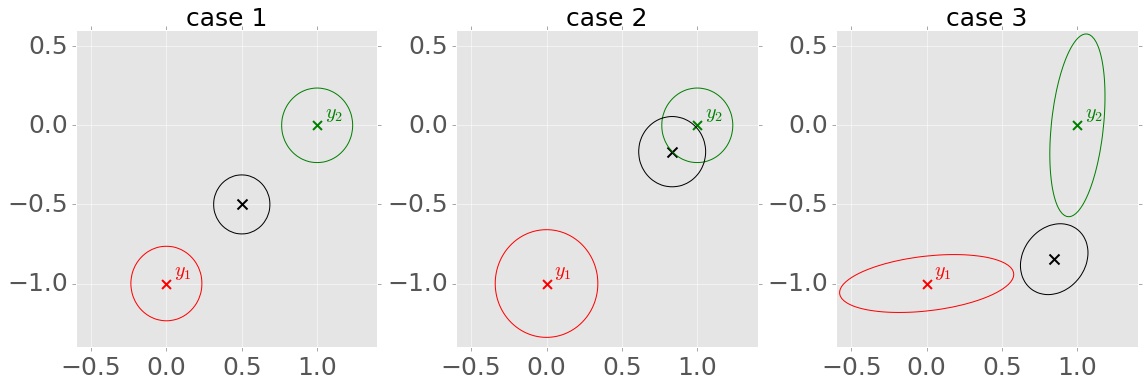

In [48]:
params_list = []
params1 = {'sigma_y1': 0.01 * np.eye(2), 'sigma_y2': 0.01 * np.eye(2)}
params2 = {'sigma_y1': 0.05 * np.eye(2), 'sigma_y2': 0.01 * np.eye(2)}
params3 = {'sigma_y1': 0.01 * np.array([[10, 1], [1, 1]]), 'sigma_y2': 0.01 * np.array([[1, 1], [1, 10]])}

params_list = [params1, params2, params3]

FONTSIZE = 25
plt.close('all')
fig = plt.figure(figsize=(16, 5.5))
gs = matplotlib.gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

x1 = np.linspace(-1, 2, 200)
x2 = np.linspace(-2, 1, 200)
X1, X2 = np.meshgrid(x1, x2)


for i, params in enumerate(params_list):
    sigma_y1 = params['sigma_y1']
    sigma_y2 = params['sigma_y2']
    sigma_y_list = [sigma_y1, sigma_y2]
    
    mu_N, sigma_N = gaussianInference(mu_0, sigma_0, observations, sigma_y_list)
    
    # Plot
    ax = plt.subplot(gs[0, i])
        
    # Sensor y1
    Z = bivariate_normal(X1, X2, np.sqrt(sigma_y1[0,0]), np.sqrt(sigma_y1[1,1]), y1[0], y1[1], sigma_y1[0, 1])
    ax.contour(X1, X2, Z, levels=[1], colors='r')
    ax.scatter(y1[0], y1[1], color='r', marker='x', s=80, lw=2)
    ax.text(y1[0]+0.05, y1[1]+0.05, r'$y_1$', fontsize=FONTSIZE*0.8, color='r')

    # Sensor y2
    Z = bivariate_normal(X1, X2, np.sqrt(sigma_y2[0,0]), np.sqrt(sigma_y2[1,1]), y2[0], y2[1], sigma_y2[0, 1])
    ax.contour(X1, X2, Z, levels=[1], colors='g')
    ax.scatter(y2[0], y2[1], color='g', marker='x', s=80, lw=2)
    ax.text(y2[0]+0.05, y2[1]+0.05, r'$y_2$', fontsize=FONTSIZE*0.8, color='g')

    # Posterior
    Z = bivariate_normal(X1, X2, np.sqrt(sigma_N[0,0]), np.sqrt(sigma_N[1,1]), mu_N[0], mu_N[1], sigma_N[0, 1])
    ax.contour(X1, X2, Z, levels=[1], colors='k')
    ax.scatter(mu_N[0], mu_N[1], color='k', marker='x', s=100, lw=2)


    ax.set_xlim(-0.6, 1.4)
    ax.set_ylim(-1.4, 0.6)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE)
        tick.label.set_rotation(0)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE)
        tick.label.set_rotation(0) 
    ax.set_title('case {0:}'.format(i+1), fontsize=FONTSIZE)

plt.tight_layout(w_pad=1, h_pad=1)    